# Import Libraries

In [102]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, Normalizer, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, roc_auc_score, classification_report
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA


from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,VotingClassifier,StackingClassifier,ExtraTreesClassifier

# Read dataset and see results

In [41]:
df = pd.read_csv("raw_data.csv")

In [3]:
df.head()

,artist,album,track_name,release_date,popularity,genres,sub-genres,explicit,followers,track_id,...,loudness,mode,speechiness,instrumentalness,liveness,tempo,duration_ms,time_signature,playlist,mood
0,Mariah Carey,The Emancipation of Mimi,We Belong Together,2005-04-12,70,dance pop,urban contemporary,0,8798554,3LmvfNUQtglbTrydsdIqFU,...,-7.890,1,0,0,0,139.986,201400,4,playlist_2005,1
1,Mario,Let Me Love You,Let Me Love You,2004-09-21,73,dance pop,hip pop,0,3079198,3ibKnFDaa3GhpPGlOUj7ff,...,-8.970,0,0,0,0,94.514,256733,4,playlist_2005,1
2,Kanye West,Late Registration,Gold Digger,2005-08-30,78,chicago rap,rap,1,19599435,1PS1QMdUqOal0ai3Gt7sDQ,...,-5.572,0,0,0,0,93.034,207627,4,playlist_2005,1
3,Rihanna,Music Of The Sun,Pon de Replay,2005-08-29,79,barbadian pop,pop,0,53901957,4TsmezEQVSZNNPv5RJ65Ov,...,-8.415,1,0,0,0,99.019,246960,4,playlist_2005,0
4,50 Cent,The Massacre,Candy Shop,2005-03-03,79,east coast hip hop,gangster rap,1,10532326,5D2mYZuzcgjpchVY1pmTPh,...,-7.961,1,0,0,0,125.173,209107,5,playlist_2005,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            1800 non-null   object 
 1   album             1800 non-null   object 
 2   track_name        1800 non-null   object 
 3   release_date      1800 non-null   object 
 4   popularity        1800 non-null   int64  
 5   genres            1795 non-null   object 
 6   sub-genres        1658 non-null   object 
 7   explicit          1800 non-null   int64  
 8   followers         1800 non-null   int64  
 9   track_id          1800 non-null   object 
 10  danceability      1800 non-null   float64
 11  energy            1800 non-null   float64
 12  key               1800 non-null   int64  
 13  loudness          1800 non-null   float64
 14  mode              1800 non-null   int64  
 15  speechiness       1800 non-null   int64  
 16  instrumentalness  1800 non-null   int64  


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
popularity,1800.0,7.034833e+01,1.135399e+01,0.0000,6.600000e+01,7.200000e+01,7.700000e+01,9.400000e+01
explicit,1800.0,2.944444e-01,4.559193e-01,0.0000,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
followers,1800.0,1.939238e+07,2.383214e+07,9694.0000,2.829673e+06,9.106410e+06,2.568627e+07,1.106354e+08
danceability,1800.0,6.623683e-01,1.382856e-01,0.1620,5.790000e-01,6.735000e-01,7.590000e-01,9.750000e-01
energy,1800.0,6.829530e-01,1.649897e-01,0.0519,5.800000e-01,7.015000e-01,8.080000e-01,9.880000e-01
...,...,...,...,...,...,...,...,...
liveness,1800.0,3.333333e-03,5.765474e-02,0.0000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
tempo,1800.0,1.208310e+02,2.703125e+01,60.0190,9.996650e+01,1.200545e+02,1.370280e+02,2.108570e+02
duration_ms,1800.0,2.210751e+05,4.027978e+04,97393.0000,1.960890e+05,2.173270e+05,2.405870e+05,6.130270e+05
time_signature,1800.0,3.985000e+00,2.116598e-01,1.0000,4.000000e+00,4.000000e+00,4.000000e+00,5.000000e+00


# Data preparation

## Improve data types

In [42]:
df['popularity'] = df['popularity'].astype('int8')
df['time_signature'] = df['time_signature'].astype('int8')
df['key']  = df['key'].astype('int8')
df['mood']  = df['mood'].astype('int8')

In [43]:
df['mode'] = df['mode'].astype('int8')
df['explicit'] =  df['explicit'].astype('int8')         
df['speechiness'] =  df['speechiness'].astype('int8')   
df['instrumentalness'] = df['instrumentalness'].astype('int8')
df['liveness'] = df['liveness'].astype('int8')

In [44]:
le = LabelEncoder()
df['genres'] = le.fit_transform(df['genres'].astype(str))
#df['genres'] = df['genres'].astype('category')
df['sub-genres'] = le.fit_transform(df['sub-genres'].astype(str))
#df['sub-genres'] = df['sub-genres'].astype('category')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            1800 non-null   object 
 1   album             1800 non-null   object 
 2   track_name        1800 non-null   object 
 3   release_date      1800 non-null   object 
 4   popularity        1800 non-null   int8   
 5   genres            1800 non-null   int32  
 6   sub-genres        1800 non-null   int32  
 7   explicit          1800 non-null   int8   
 8   followers         1800 non-null   int64  
 9   track_id          1800 non-null   object 
 10  danceability      1800 non-null   float64
 11  energy            1800 non-null   float64
 12  key               1800 non-null   int8   
 13  loudness          1800 non-null   float64
 14  mode              1800 non-null   int8   
 15  speechiness       1800 non-null   int8   
 16  instrumentalness  1800 non-null   int8   


In [10]:
df.head()

,artist,album,track_name,release_date,popularity,genres,sub-genres,explicit,followers,track_id,...,loudness,mode,speechiness,instrumentalness,liveness,tempo,duration_ms,time_signature,playlist,mood
0,Mariah Carey,The Emancipation of Mimi,We Belong Together,2005-04-12,70,64,157,0,8798554,3LmvfNUQtglbTrydsdIqFU,...,-7.890,1,0,0,0,139.986,201400,4,playlist_2005,1
1,Mario,Let Me Love You,Let Me Love You,2004-09-21,73,64,70,0,3079198,3ibKnFDaa3GhpPGlOUj7ff,...,-8.970,0,0,0,0,94.514,256733,4,playlist_2005,1
2,Kanye West,Late Registration,Gold Digger,2005-08-30,78,51,136,1,19599435,1PS1QMdUqOal0ai3Gt7sDQ,...,-5.572,0,0,0,0,93.034,207627,4,playlist_2005,1
3,Rihanna,Music Of The Sun,Pon de Replay,2005-08-29,79,22,120,0,53901957,4TsmezEQVSZNNPv5RJ65Ov,...,-8.415,1,0,0,0,99.019,246960,4,playlist_2005,0
4,50 Cent,The Massacre,Candy Shop,2005-03-03,79,80,60,1,10532326,5D2mYZuzcgjpchVY1pmTPh,...,-7.961,1,0,0,0,125.173,209107,5,playlist_2005,1


## Outlier Detection

In [11]:
continuous = df[["popularity","followers","danceability","energy","loudness","tempo","duration_ms"]]

Q1 = continuous.quantile(0.25)
Q3 = continuous.quantile(0.75)
IQR = Q3 - Q1

superior = (continuous > (Q3 + 1.5 * IQR)).sum()
inferior = (continuous < (Q1 - 1.5 * IQR)).sum()   

In [12]:
print("Superior Outliers")
print(superior/len(df)*100)

Superior Outliers
popularity       0.111111
followers       10.444444
danceability     0.000000
energy           0.000000
loudness         0.055556
tempo            0.833333
duration_ms      2.722222
dtype: float64


In [13]:
print("Inferior Outliers")
print(inferior/len(df)*100)

Inferior Outliers
popularity      2.333333
followers       0.000000
danceability    1.000000
energy          0.944444
loudness        2.833333
tempo           0.000000
duration_ms     0.555556
dtype: float64


## Build train dataset

In [46]:
train = df.drop(columns = ['artist', 'album', 'track_name','release_date','track_id','playlist','speechiness'], axis = 1)
X = train.drop("mood", axis=1)
y = train["mood"]

### Split data train and test

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Correlation Analysis

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


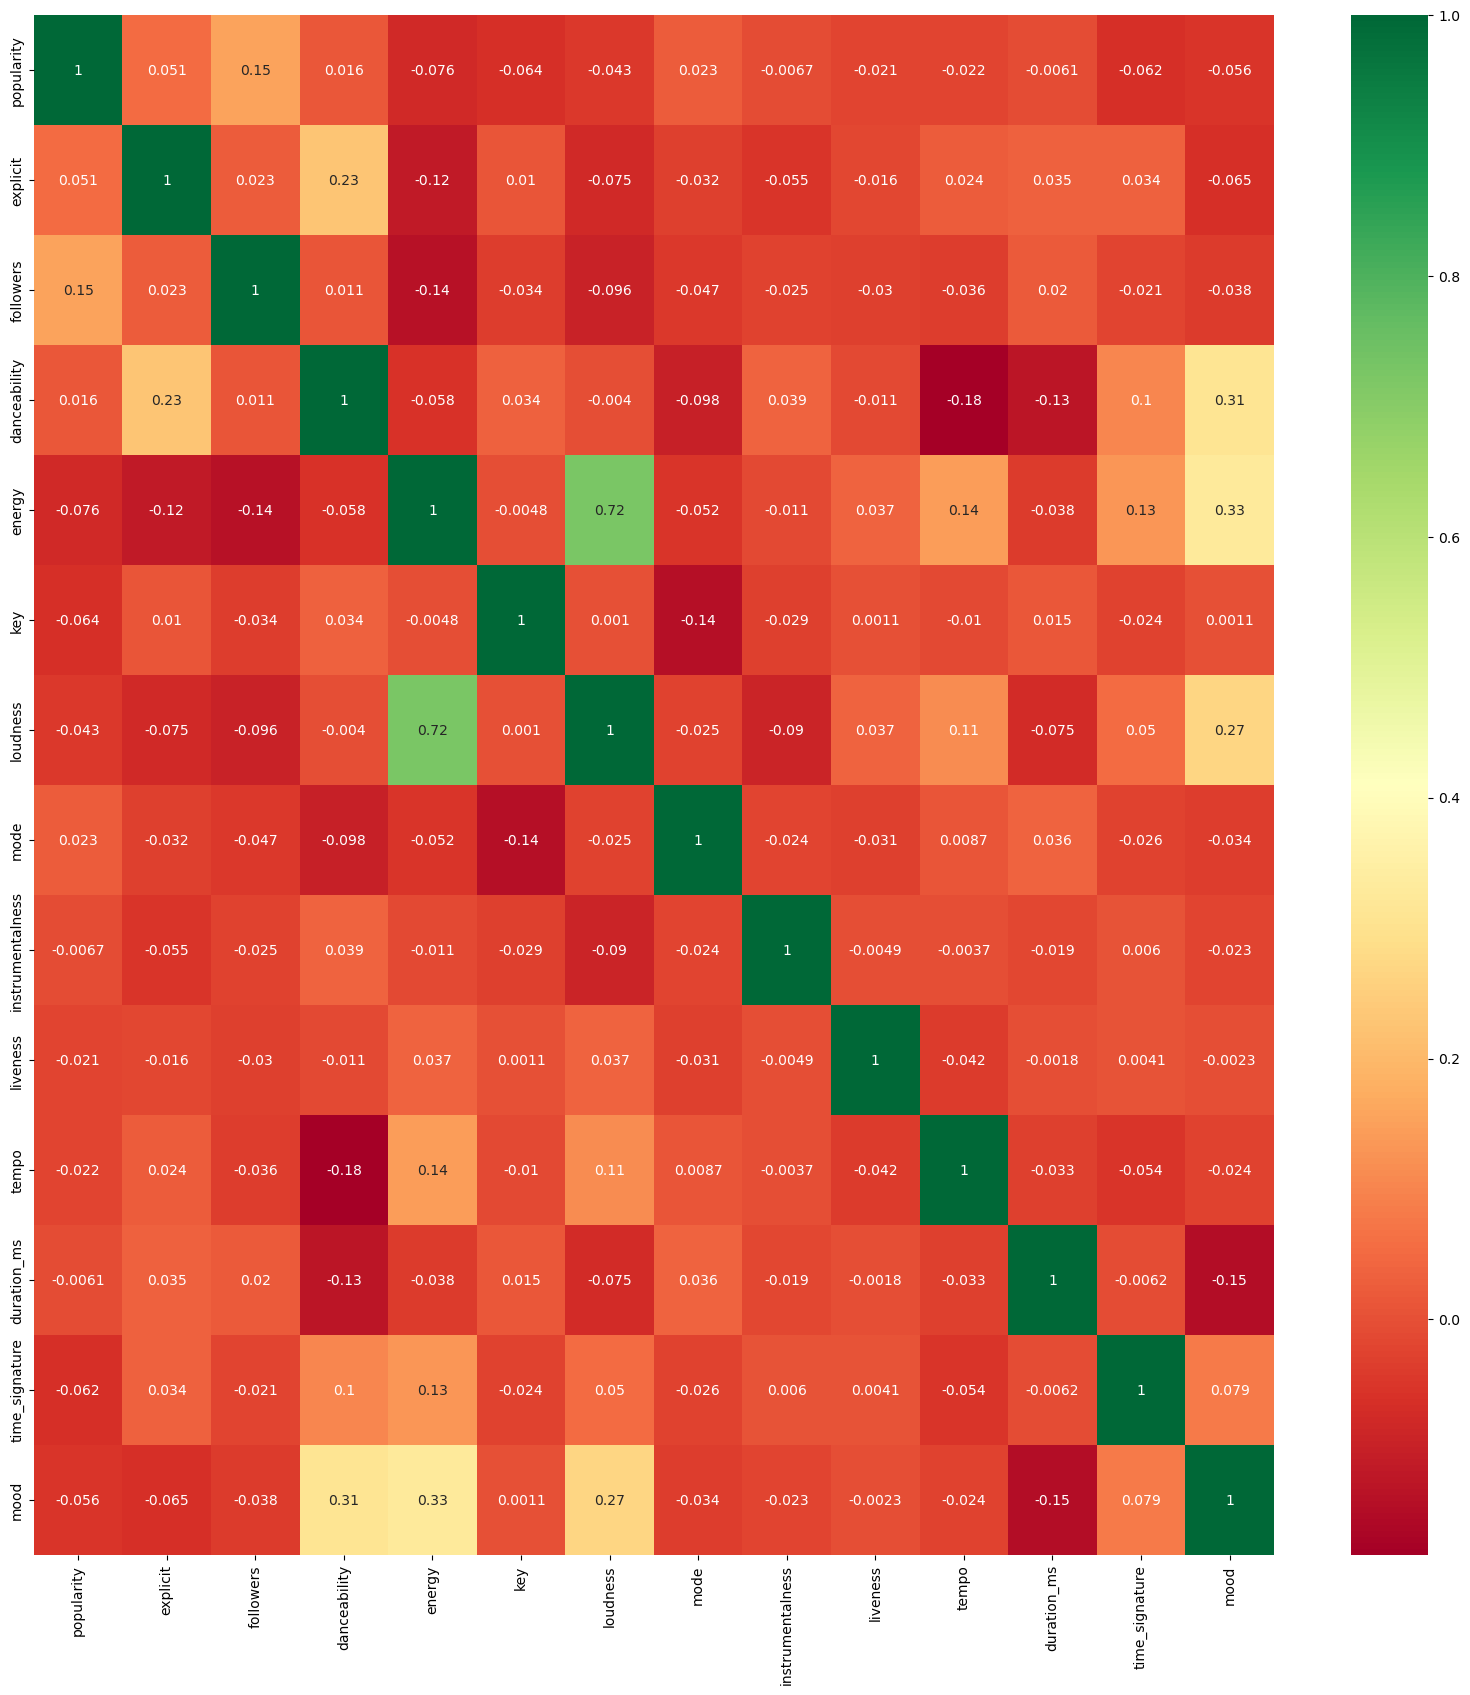

In [15]:
corr_mat = train.corr()
top_corr_features = corr_mat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(train[top_corr_features].corr(), annot=True, cmap="RdYlGn")

## PCA Analysis

9


Text(0, 0.5, 'Cumulative explained variance')

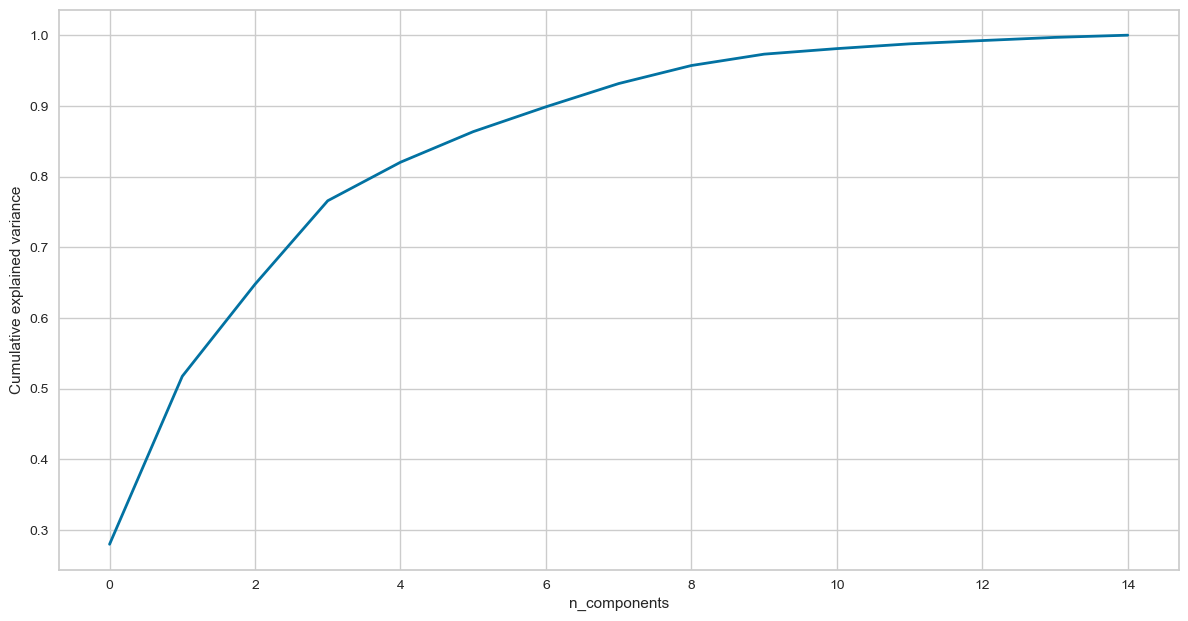

In [79]:
#normalization
x_train_N = (X_train-X_train.mean())/(X_train.max()-X_train.min())

pca = PCA().fit(x_train_N)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(n_components)

# Transform the training and testing data to the selected number of principal components
X_train_pca = pca.transform(X_train)[:, :n_components]
X_test_pca = pca.transform(X_test)[:, :n_components]

plt.figure(1, figsize=(16, 8))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(cumulative_variance, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('Cumulative explained variance')

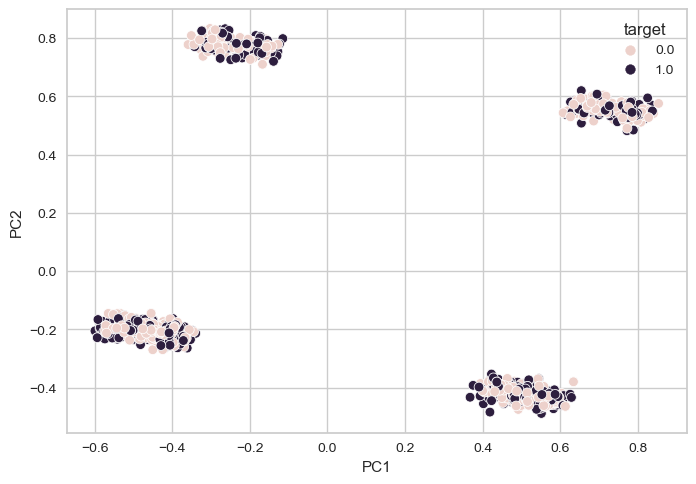

In [65]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(x_train_N)

# Convert the transformed data to a pandas DataFrame
df_train = pd.DataFrame(X_train_pca, columns=['PC1', 'PC2'])
df_train['target'] = y_train

sns.scatterplot(data=df_train, x='PC1', y='PC2', hue='target')
plt.show()

# Modelling

## AutoML TPOT

In [19]:
from tpot import TPOTClassifier

### Standard Training

In [32]:
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42, cv=5)

tpot.fit(X_train, y_train)

best_pipeline = tpot.fitted_pipeline_

y_pred = best_pipeline.predict(X_test)
y_pred_probs = best_pipeline.predict_proba(X_test)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC score:",roc_auc_score(y_test, y_pred_probs))
print("Cross_val_score:",cross_val_score(best_pipeline, X_train, y_train, cv=5).mean())
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d")

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.726388888888889

Generation 2 - Current best internal CV score: 0.726388888888889

Generation 3 - Current best internal CV score: 0.726388888888889

Generation 4 - Current best internal CV score: 0.7298611111111111

Generation 5 - Current best internal CV score: 0.7298611111111111

Best pipeline: ExtraTreesClassifier(input_matrix, bootstrap=False, criterion=gini, max_features=0.9500000000000001, min_samples_leaf=13, min_samples_split=19, n_estimators=100)


### Feature selection PCA

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.5993055555555555

Generation 2 - Current best internal CV score: 0.5993055555555555

Generation 3 - Current best internal CV score: 0.5993055555555555

Generation 4 - Current best internal CV score: 0.5993055555555555

Generation 5 - Current best internal CV score: 0.6020833333333334

Best pipeline: RandomForestClassifier(StandardScaler(PCA(BernoulliNB(input_matrix, alpha=1.0, fit_prior=False), iterated_power=7, svd_solver=randomized)), bootstrap=False, criterion=gini, max_features=0.9000000000000001, min_samples_leaf=13, min_samples_split=19, n_estimators=100)
Accuracy: 0.6277777777777778
ROC score: 0.7071806126549411
Cross_val_score: 0.6020833333333334
              precision    recall  f1-score   support

           0       0.60      0.65      0.63       173
           1       0.65      0.60      0.63       187

    accuracy                           0.63       360
   macro avg       0.63      0.63      0.63       360
weighted avg   

<AxesSubplot:>

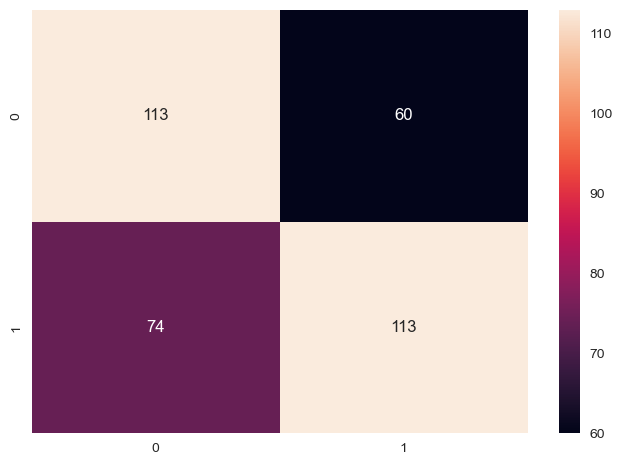

In [ ]:
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42, cv=5)

tpot.fit(X_train_pca, y_train)

best_pipeline = tpot.fitted_pipeline_

y_pred = best_pipeline.predict(X_test_pca)
y_pred_probs = best_pipeline.predict_proba(X_test_pca)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC score:",roc_auc_score(y_test, y_pred_probs))
print("Cross_val_score:",cross_val_score(best_pipeline, X_train_pca, y_train, cv=5).mean())
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d")

In [36]:
tpot.export('tpot_best_pipeline.py')

## XGB

### Standard Training

Accuracy: 0.7333333333333333
ROC score: 0.8002534697536398
Cross_val_score: 0.6923611111111111
              precision    recall  f1-score   support

           0       0.73      0.71      0.72       173
           1       0.74      0.76      0.75       187

    accuracy                           0.73       360
   macro avg       0.73      0.73      0.73       360
weighted avg       0.73      0.73      0.73       360



<AxesSubplot:>

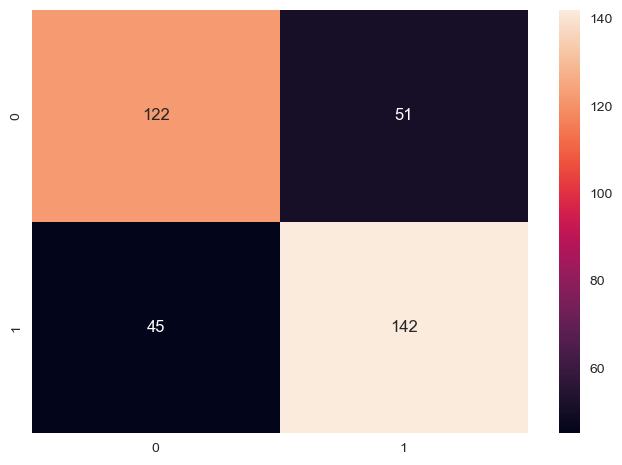

In [81]:
np.random.seed(42)

xgb = XGBClassifier()

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
y_pred_probs = xgb.predict_proba(X_test)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC score:",roc_auc_score(y_test, y_pred_probs))
print("Cross_val_score:",cross_val_score(xgb, X_train, y_train, cv=5).mean())
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d")

### Feature selection PCA

Accuracy: 0.5722222222222222
ROC score: 0.6176006924051807
Cross_val_score: 0.5902777777777778
              precision    recall  f1-score   support

           0       0.56      0.53      0.54       173
           1       0.58      0.61      0.60       187

    accuracy                           0.57       360
   macro avg       0.57      0.57      0.57       360
weighted avg       0.57      0.57      0.57       360



<AxesSubplot:>

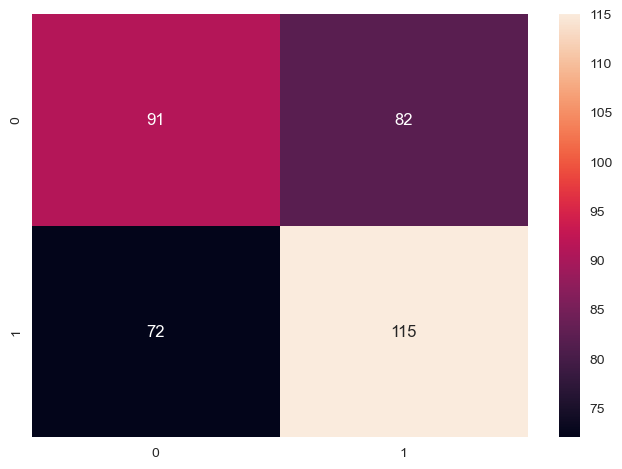

In [80]:
np.random.seed(42)

xgb = XGBClassifier()

xgb.fit(X_train_pca, y_train)

y_pred = xgb.predict(X_test_pca)
y_pred_probs = xgb.predict_proba(X_test_pca)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC score:",roc_auc_score(y_test, y_pred_probs))
print("Cross_val_score:",cross_val_score(xgb, X_train_pca, y_train, cv=5).mean())
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d")

### Recursive Feature Selection

In [90]:
rfecv = RFECV(estimator = xgb, step=1, cv=5, scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features : 7
Best features : Index(['genres', 'explicit', 'danceability', 'energy', 'loudness', 'tempo',
       'duration_ms'],
      dtype='object')


### Hyperparameter Optimization

In [92]:
#grid
params = {
        #'min_child_weight': [1, 5, 10, 15],
        #'gamma': [0, 0.5, 1, 1.5, 2, 5],
        #'subsample': [0, 0.6, 0.8, 1.0],
        #'colsample_bytree': [0, 0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 13, 24, 32],
        'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4],
        'n_estimators': [50, 100, 250, 500, 750, 1000]
        }

clf = GridSearchCV(xgb, params, cv = 5, scoring="accuracy", n_jobs=-1)
clf_fs = GridSearchCV(xgb, params, cv = 5, scoring="accuracy", n_jobs=-1)

### Feature Selection 
X_train_fs = X_train[['genres', 'explicit', 'danceability', 'energy', 'loudness', 'tempo','duration_ms']]
X_test_fs = X_test[['genres', 'explicit', 'danceability', 'energy', 'loudness', 'tempo','duration_ms']]

# Fit
clf.fit(X_train, y_train)
clf_fs.fit(X_train_fs, y_train)

y_pred = clf.predict(X_test)
y_pred_probs = clf.predict_proba(X_test)[:,1]

y_pred_fs = clf_fs.predict(X_test_fs)
y_pred_probs_fs = clf_fs.predict_proba(X_test_fs)[:,1]

# Score
print("Tuned xgb Parameters: {}, Accuracy: {}".format(accuracy_score(y_test, y_pred), clf.best_params_))
print("Tuned xgb Parameters: {}, ROC score: {}".format(roc_auc_score(y_test, y_pred_probs), clf.best_params_))
print("Tuned xgb Parameters: {}, Cross_val_score: {}".format(cross_val_score(clf, X_train, y_train, cv=5).mean(), clf.best_params_))

# Score
print("Tuned xgb Parameters_fs: {}, Accuracy: {}".format(accuracy_score(y_test, y_pred_fs), clf.best_params_))
print("Tuned xgb Parameters_fs: {}, ROC score: {}".format(roc_auc_score(y_test, y_pred_probs_fs), clf.best_params_))
print("Tuned xgb Parameters_fs: {}, Cross_val_score: {}".format(cross_val_score(clf_fs, X_train_fs, y_train, cv=5).mean(), clf.best_params_))

Tuned xgb Parameters: 0.7444444444444445, Accuracy: {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 250}
Tuned xgb Parameters: 0.8093103768044264, ROC score: {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 250}
Tuned xgb Parameters: 0.7027777777777778, Cross_val_score: {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 250}
Tuned xgb Parameters_fs: 0.75, Accuracy: {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 250}
Tuned xgb Parameters_fs: 0.80869215789311, ROC score: {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 250}
Tuned xgb Parameters_fs: 0.7069444444444445, Cross_val_score: {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 250}


## LGBM

Accuracy: 0.7638888888888888
ROC score: 0.8190164137120954
Cross_val_score: 0.7027777777777777
              precision    recall  f1-score   support

           0       0.77      0.73      0.75       173
           1       0.76      0.80      0.78       187

    accuracy                           0.76       360
   macro avg       0.76      0.76      0.76       360
weighted avg       0.76      0.76      0.76       360



<AxesSubplot:>

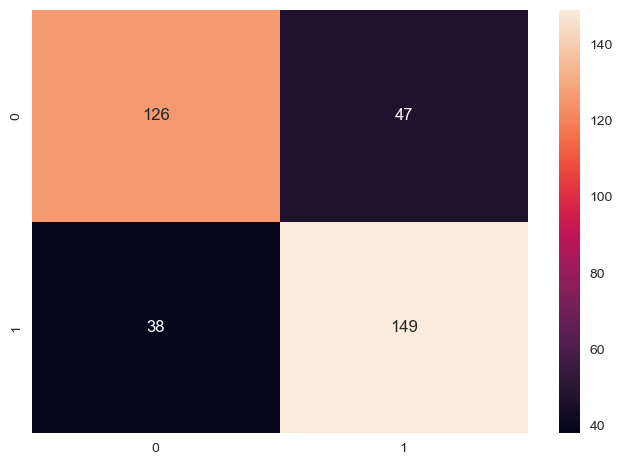

In [55]:
np.random.seed(42)

lgbm = lgb.LGBMClassifier()

lgbm.fit(X_train, y_train)

y_pred = lgbm.predict(X_test)
y_pred_probs = lgbm.predict_proba(X_test)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC score:",roc_auc_score(y_test, y_pred_probs))
print("Cross_val_score:",cross_val_score(lgbm, X_train, y_train, cv=5).mean())
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d")

## Random Forest

Accuracy: 0.7472222222222222
ROC score: 0.8244258291861147
Cross_val_score: 0.7006944444444444
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       173
           1       0.76      0.75      0.76       187

    accuracy                           0.75       360
   macro avg       0.75      0.75      0.75       360
weighted avg       0.75      0.75      0.75       360



<AxesSubplot:>

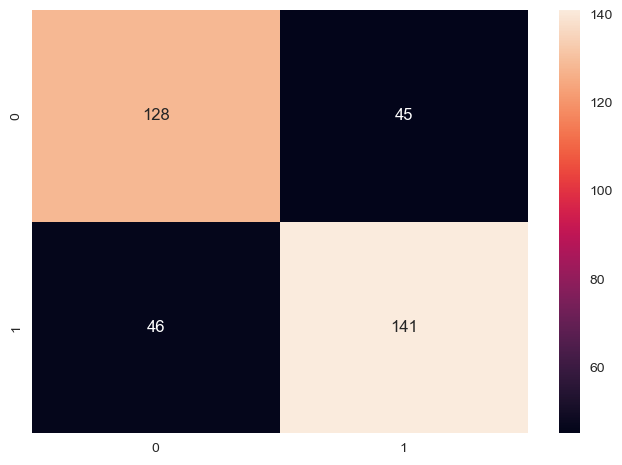

In [93]:
np.random.seed(42)

rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)
y_pred_probs = rfc.predict_proba(X_test)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC score:",roc_auc_score(y_test, y_pred_probs))
print("Cross_val_score:",cross_val_score(rfc, X_train, y_train, cv=5).mean())
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d")

## Decision Tree

Accuracy: 0.6527777777777778
ROC score: 0.6525764273129115
Cross_val_score: 0.6402777777777777
              precision    recall  f1-score   support

           0       0.64      0.65      0.64       173
           1       0.67      0.66      0.66       187

    accuracy                           0.65       360
   macro avg       0.65      0.65      0.65       360
weighted avg       0.65      0.65      0.65       360



<AxesSubplot:>

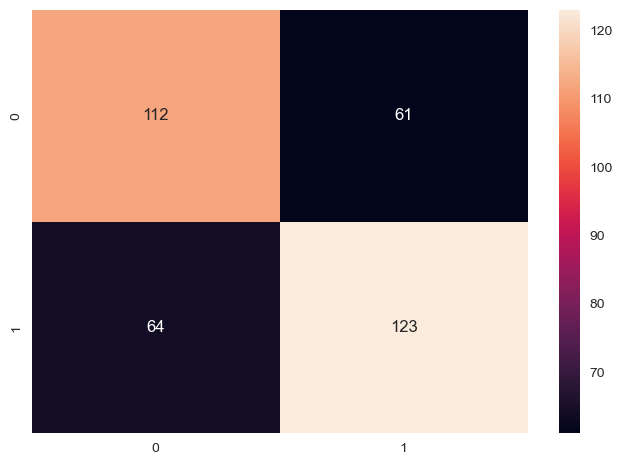

In [97]:
np.random.seed(42)

dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)
y_pred_probs = dtc.predict_proba(X_test)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC score:",roc_auc_score(y_test, y_pred_probs))
print("Cross_val_score:",cross_val_score(dtc, X_train, y_train, cv=5).mean())
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d")

## Extra Trees

Accuracy: 0.7527777777777778
ROC score: 0.8264504961206763
Cross_val_score: 0.7125
              precision    recall  f1-score   support

           0       0.75      0.73      0.74       173
           1       0.76      0.77      0.76       187

    accuracy                           0.75       360
   macro avg       0.75      0.75      0.75       360
weighted avg       0.75      0.75      0.75       360



<AxesSubplot:>

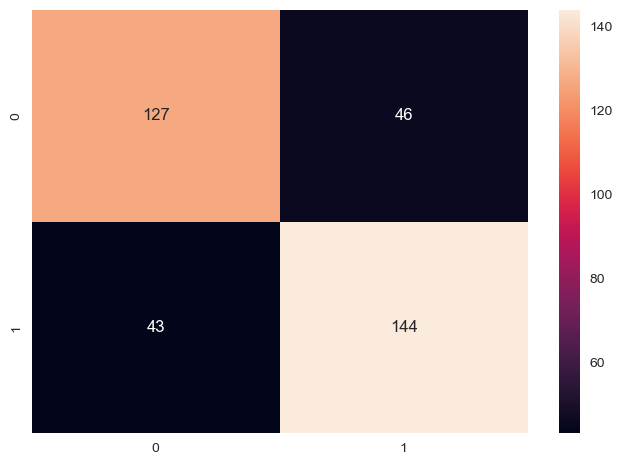

In [96]:
np.random.seed(42)

etc = ExtraTreesClassifier()

etc.fit(X_train, y_train)

y_pred = etc.predict(X_test)
y_pred_probs = etc.predict_proba(X_test)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC score:",roc_auc_score(y_test, y_pred_probs))
print("Cross_val_score:",cross_val_score(etc, X_train, y_train, cv=5).mean())
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d")

## Gradient Boosting

Accuracy: 0.7361111111111112
ROC score: 0.8197273654601094
Cross_val_score: 0.7006944444444445
              precision    recall  f1-score   support

           0       0.73      0.71      0.72       173
           1       0.74      0.76      0.75       187

    accuracy                           0.74       360
   macro avg       0.74      0.74      0.74       360
weighted avg       0.74      0.74      0.74       360



<AxesSubplot:>

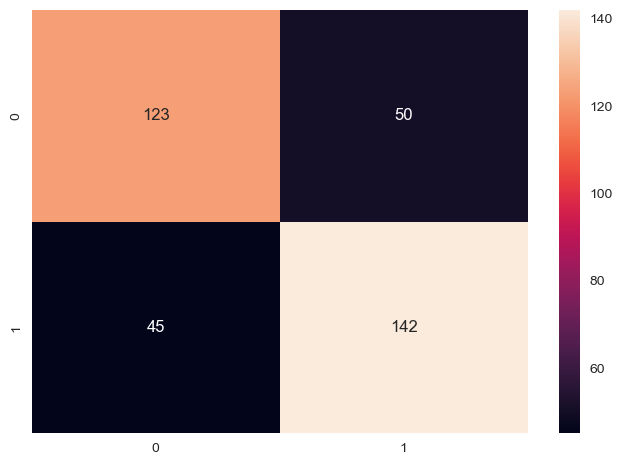

In [98]:
np.random.seed(42)

gbc = GradientBoostingClassifier()

gbc.fit(X_train, y_train)

y_pred = gbc.predict(X_test)
y_pred_probs = gbc.predict_proba(X_test)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC score:",roc_auc_score(y_test, y_pred_probs))
print("Cross_val_score:",cross_val_score(gbc, X_train, y_train, cv=5).mean())
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d")

## Cat Boosting

Learning rate set to 0.012038
0:	learn: 0.6901386	total: 166ms	remaining: 2m 46s
1:	learn: 0.6873437	total: 169ms	remaining: 1m 24s
2:	learn: 0.6843668	total: 172ms	remaining: 57.1s
3:	learn: 0.6812952	total: 175ms	remaining: 43.5s
4:	learn: 0.6785478	total: 178ms	remaining: 35.5s
5:	learn: 0.6754689	total: 182ms	remaining: 30.1s
6:	learn: 0.6726226	total: 184ms	remaining: 26.2s
7:	learn: 0.6694246	total: 187ms	remaining: 23.2s
8:	learn: 0.6670581	total: 191ms	remaining: 21s
9:	learn: 0.6643243	total: 195ms	remaining: 19.3s
10:	learn: 0.6614257	total: 198ms	remaining: 17.8s
11:	learn: 0.6595718	total: 201ms	remaining: 16.5s
12:	learn: 0.6574227	total: 205ms	remaining: 15.5s
13:	learn: 0.6551982	total: 208ms	remaining: 14.6s
14:	learn: 0.6528121	total: 212ms	remaining: 13.9s
15:	learn: 0.6504227	total: 216ms	remaining: 13.3s
16:	learn: 0.6481443	total: 220ms	remaining: 12.7s
17:	learn: 0.6456965	total: 223ms	remaining: 12.2s
18:	learn: 0.6434374	total: 226ms	remaining: 11.7s
19:	learn: 

<AxesSubplot:>

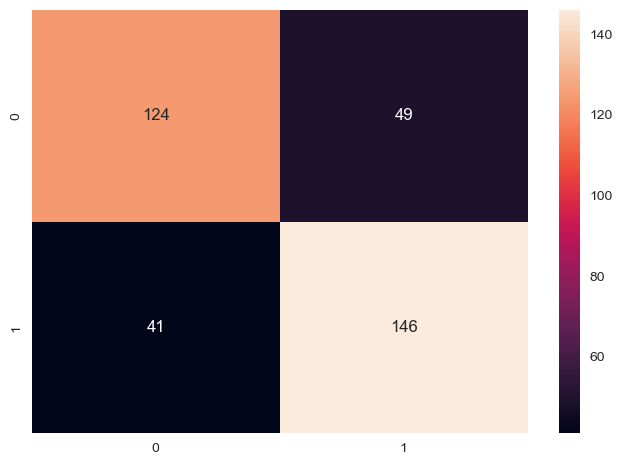

In [101]:
np.random.seed(42)

cbc = CatBoostClassifier()

cbc.fit(X_train, y_train)

y_pred = cbc.predict(X_test)
y_pred_probs = cbc.predict_proba(X_test)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC score:",roc_auc_score(y_test, y_pred_probs))
print("Cross_val_score:",cross_val_score(cbc, X_train, y_train, cv=5).mean())
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d")